## 算法原理：读取之前处理生成的capm_data.csv数据，将数据分为训练集和测试集，对训练集中的数据	ret_000300-ret_rf作为自变量，ret_600519-ret_rf作为因变量，对其进行回归。求出β值，和截距b（为了回归结果更为准确，对原公式进行了变更）。再根据回归结果，对测试集中的数据，以β*（ret_600519-ret_rf）+b为预测值，以ret_600519-ret_rf为真实值。α=真实值-预测值，α>0，低估，买进；α<0高估。卖出。再根据该策略对该时间段内的数据进行买进卖出。最后再对比策略下的收益率与被动投资的收益率。

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv('capm_data.csv')
data.set_index(['date'],inplace=True)

In [3]:
data

,close_000300,ret_000300,close_600519,ret_600519,ret_rf
date,,,,,
2019-05-07,3720.6680,1.009784,890.00,0.982340,1.000000
2019-05-08,3667.4570,0.995343,884.40,0.976159,1.000053
2019-05-09,3599.7000,0.976954,858.81,0.947914,1.000105
2019-05-10,3730.4510,1.012440,907.12,1.001236,1.000158
2019-05-13,3668.7250,0.995687,892.00,0.984547,1.000211
...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095


In [4]:
data['return_x']=data['ret_000300']-data['ret_rf']
data['return_y']=data['ret_600519']-data['ret_rf']

In [5]:
data

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y
date,,,,,,,
2019-05-07,3720.6680,1.009784,890.00,0.982340,1.000000,0.009784,-0.017660
2019-05-08,3667.4570,0.995343,884.40,0.976159,1.000053,-0.004710,-0.023894
2019-05-09,3599.7000,0.976954,858.81,0.947914,1.000105,-0.023152,-0.052192
2019-05-10,3730.4510,1.012440,907.12,1.001236,1.000158,0.012281,0.001078
2019-05-13,3668.7250,0.995687,892.00,0.984547,1.000211,-0.004524,-0.015663
...,...,...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989,0.381209,1.245490
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042,0.381866,1.246927
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095,0.377653,1.235495


In [6]:
data_ndarray=data.values
data_ndarray_x=data_ndarray[:,5]
data_ndarray_y=data_ndarray[:,6]
data_ndarray_x=data_ndarray_x[:,np.newaxis]
data_ndarray_y=data_ndarray_y[:,np.newaxis]

In [7]:
data_ndarray_x.shape

(498, 1)

In [8]:
data_ndarray_y.shape

(498, 1)

In [9]:
data_ndarray_x

array([[ 9.78446601e-03],
       [-4.70964663e-03],
       [-2.31515248e-02],
       [ 1.22814106e-02],
       [-4.52366197e-03],
       [-1.09746027e-02],
       [ 1.12116335e-02],
       [ 1.57376847e-02],
       [-1.01530022e-02],
       [-1.86103935e-02],
       [-5.36891582e-03],
       [-1.01431553e-02],
       [-2.79494177e-02],
       [-2.53019883e-02],
       [-1.36074832e-02],
       [-4.14414683e-03],
       [-6.46331369e-03],
       [-1.26838369e-02],
       [-1.58288700e-02],
       [-1.52782670e-02],
       [-2.44353241e-02],
       [-2.48574141e-02],
       [-3.37110475e-02],
       [-2.12615112e-02],
       [ 8.14121647e-03],
       [ 4.40484746e-04],
       [-1.15974695e-03],
       [-9.49392324e-03],
       [-9.56156647e-03],
       [-6.14200777e-03],
       [ 6.91926121e-03],
       [ 3.74206108e-02],
       [ 3.88388755e-02],
       [ 4.07746975e-02],
       [ 2.98779746e-02],
       [ 2.79314382e-02],
       [ 3.88665697e-02],
       [ 3.63088434e-02],
       [ 6.6

In [10]:
data_ndarray_y

array([[-1.76600442e-02],
       [-2.38937759e-02],
       [-5.21915253e-02],
       [ 1.07805420e-03],
       [-1.56634038e-02],
       [-2.17094976e-02],
       [ 2.28625102e-02],
       [ 2.60217144e-02],
       [ 4.50234298e-04],
       [-2.36974047e-02],
       [-1.26684433e-02],
       [-2.04474289e-02],
       [-5.03014697e-02],
       [-3.10385128e-02],
       [-3.05393527e-02],
       [-2.06582941e-02],
       [ 5.67971804e-03],
       [-1.66880399e-03],
       [-1.86089375e-02],
       [-1.64541483e-02],
       [-3.49395357e-02],
       [-3.90761372e-02],
       [-4.95813921e-02],
       [-3.97555212e-02],
       [ 4.13215985e-03],
       [-5.45280513e-04],
       [ 3.04438730e-03],
       [ 6.30292928e-03],
       [ 4.70495911e-03],
       [ 1.06125077e-02],
       [ 2.71271203e-02],
       [ 7.45247352e-02],
       [ 7.59068975e-02],
       [ 8.77747110e-02],
       [ 8.31745333e-02],
       [ 7.96781084e-02],
       [ 9.78262751e-02],
       [ 8.41422122e-02],
       [ 1.3

## 开始线性回归，数据整体为498行，前408行为训练集，后90行为测试集。对训练集进行回归，并将结果在测试集在进行试验。

In [26]:
data_x_train=data_ndarray_x[0:408]
data_x_test=data_ndarray_x[408:498]

In [27]:
data_y_train=data_ndarray_y[0:408]
data_y_test=data_ndarray_y[408:498]

In [28]:
regr=linear_model.LinearRegression()

In [29]:
regr.fit(data_x_train,data_y_train)

LinearRegression()

In [30]:
data_y_pred=regr.predict(data_x_test)

In [31]:
print('Coefficients β: \n', regr.coef_)
print('Intercept b: \n', regr.intercept_)

Coefficients β: 
 [[2.64200563]]
Intercept b: 
 [0.11938404]


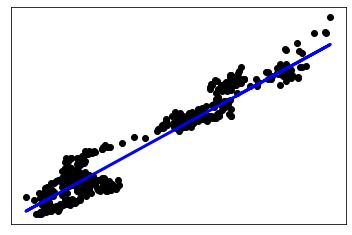

In [32]:
#绘图，先看整体情况
plt.scatter(data_ndarray_x,data_ndarray_y,color='black')
plt.plot(data_ndarray_x,data_ndarray_x*regr.coef_+regr.intercept_,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

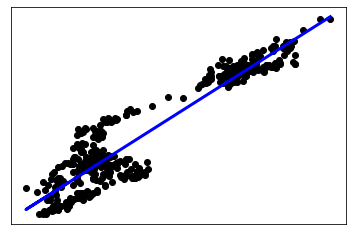

In [33]:
#绘图，再看训练集数据情况
plt.scatter(data_x_train,data_y_train,color='black')
plt.plot(data_x_train,data_x_train*regr.coef_+regr.intercept_,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

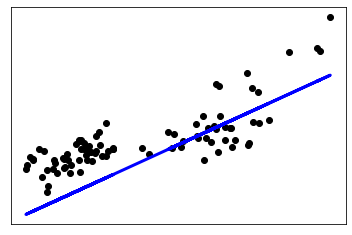

In [34]:
#绘图，再看测试集数据情况
plt.scatter(data_x_test,data_y_test,color='black')
plt.plot(data_x_test,data_y_pred,color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

## 求出回归中的β系数为：2.64200563，截距b为：0.11938404。

In [35]:
data

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y
date,,,,,,,
2019-05-07,3720.6680,1.009784,890.00,0.982340,1.000000,0.009784,-0.017660
2019-05-08,3667.4570,0.995343,884.40,0.976159,1.000053,-0.004710,-0.023894
2019-05-09,3599.7000,0.976954,858.81,0.947914,1.000105,-0.023152,-0.052192
2019-05-10,3730.4510,1.012440,907.12,1.001236,1.000158,0.012281,0.001078
2019-05-13,3668.7250,0.995687,892.00,0.984547,1.000211,-0.004524,-0.015663
...,...,...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989,0.381209,1.245490
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042,0.381866,1.246927
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095,0.377653,1.235495


In [36]:
a=2.64200563
b=0.11938404

In [37]:
data['alpha']=data['return_y']-(data['return_x']*a+b)

In [38]:
data

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y,alpha
date,,,,,,,,
2019-05-07,3720.6680,1.009784,890.00,0.982340,1.000000,0.009784,-0.017660,-0.162895
2019-05-08,3667.4570,0.995343,884.40,0.976159,1.000053,-0.004710,-0.023894,-0.130835
2019-05-09,3599.7000,0.976954,858.81,0.947914,1.000105,-0.023152,-0.052192,-0.110409
2019-05-10,3730.4510,1.012440,907.12,1.001236,1.000158,0.012281,0.001078,-0.150754
2019-05-13,3668.7250,0.995687,892.00,0.984547,1.000211,-0.004524,-0.015663,-0.123096
...,...,...,...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989,0.381209,1.245490,0.118949
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042,0.381866,1.246927,0.118650
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095,0.377653,1.235495,0.118349


In [41]:
#截取测试集数据，并对它进行测试
data_cal=data[408:498]

In [43]:
data_cal

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y,alpha
date,,,,,,,,
2021-01-05,5368.5049,1.457005,2059.45,2.273124,1.021508,0.435497,1.251615,-0.018354
2021-01-06,5417.6677,1.470348,2100.00,2.317881,1.021561,0.448787,1.296320,-0.008762
2021-01-07,5513.6568,1.496399,2140.00,2.362031,1.021614,0.474786,1.340417,-0.033353
2021-01-08,5495.4306,1.491453,2090.00,2.306843,1.021666,0.469786,1.285177,-0.075385
2021-01-11,5441.1583,1.476723,2099.73,2.317583,1.021719,0.455004,1.295864,-0.025644
...,...,...,...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989,0.381209,1.245490,0.118949
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042,0.381866,1.246927,0.118650
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095,0.377653,1.235495,0.118349


In [46]:
#对alpha的数据进行平移一位，取出Alpha正负出现变化的关键点，作为买入或卖出的时点
data_cal['alpha_div']=data_cal['alpha']/data_cal['alpha'].shift(1)

<ipython-input-46-b11ee688524f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cal['alpha_div']=data_cal['alpha']/data_cal['alpha'].shift(1)


In [47]:
data_cal

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y,alpha,alpha_div
date,,,,,,,,,
2021-01-05,5368.5049,1.457005,2059.45,2.273124,1.021508,0.435497,1.251615,-0.018354,NaN
2021-01-06,5417.6677,1.470348,2100.00,2.317881,1.021561,0.448787,1.296320,-0.008762,0.477385
2021-01-07,5513.6568,1.496399,2140.00,2.362031,1.021614,0.474786,1.340417,-0.033353,3.806546
2021-01-08,5495.4306,1.491453,2090.00,2.306843,1.021666,0.469786,1.285177,-0.075385,2.260220
2021-01-11,5441.1583,1.476723,2099.73,2.317583,1.021719,0.455004,1.295864,-0.025644,0.340172
...,...,...,...,...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989,0.381209,1.245490,0.118949,0.998690
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042,0.381866,1.246927,0.118650,0.997485
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095,0.377653,1.235495,0.118349,0.997459


In [49]:
#找到变化的关键时点，列action为行动指南，1为买，-1为卖，0为不动
data_cal['action']=data_cal.apply(lambda x: 0 if (x['alpha_div'] >= 0) else (1 if (x['alpha'] > 0) else -1), axis=1)

<ipython-input-49-74ac9ba7d3e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cal['action']=data_cal.apply(lambda x: 0 if (x['alpha_div'] >= 0) else (1 if (x['alpha'] > 0) else -1), axis=1)


In [50]:
data_cal

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y,alpha,alpha_div,action
date,,,,,,,,,,
2021-01-05,5368.5049,1.457005,2059.45,2.273124,1.021508,0.435497,1.251615,-0.018354,NaN,-1
2021-01-06,5417.6677,1.470348,2100.00,2.317881,1.021561,0.448787,1.296320,-0.008762,0.477385,0
2021-01-07,5513.6568,1.496399,2140.00,2.362031,1.021614,0.474786,1.340417,-0.033353,3.806546,0
2021-01-08,5495.4306,1.491453,2090.00,2.306843,1.021666,0.469786,1.285177,-0.075385,2.260220,0
2021-01-11,5441.1583,1.476723,2099.73,2.317583,1.021719,0.455004,1.295864,-0.025644,0.340172,0
...,...,...,...,...,...,...,...,...,...,...
2021-05-17,5184.9853,1.407198,2057.96,2.271479,1.025989,0.381209,1.245490,0.118949,0.998690,0
2021-05-18,5187.6013,1.407908,2059.31,2.272969,1.026042,0.381866,1.246927,0.118650,0.997485,0
2021-05-19,5172.2720,1.403748,2049.00,2.261589,1.026095,0.377653,1.235495,0.118349,0.997459,0


In [51]:
#删去action中为0的行，便于看数据
data_cal=data_cal[~data_cal['action'].isin([0])]
data_cal

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y,alpha,alpha_div,action
date,,,,,,,,,,
2021-01-05,5368.5049,1.457005,2059.45,2.273124,1.021508,0.435497,1.251615,-0.018354,NaN,-1
2021-01-28,5377.1427,1.459350,2088.00,2.304636,1.022404,0.436945,1.282231,0.008436,-0.085452,1
2021-02-02,5501.0915,1.492989,2145.00,2.367550,1.022563,0.470427,1.344987,-0.017266,-5.575457,-1
2021-02-03,5485.2008,1.488676,2189.91,2.417119,1.022615,0.466061,1.394504,0.043784,-2.535776,1
2021-03-02,5349.6301,1.451883,2058.00,2.271523,1.023353,0.428529,1.248170,-0.003391,-0.059170,-1
2021-03-03,5452.2125,1.479723,2140.00,2.362031,1.023406,0.456317,1.338625,0.013648,-4.024563,1


In [52]:
#开始操作为买入，最终操作为卖出。删除上表的第一行和最后一行
data_cal=data_cal[~data_cal.index.isin(['2021-01-05','2021-03-03'])]

In [53]:
data_cal

,close_000300,ret_000300,close_600519,ret_600519,ret_rf,return_x,return_y,alpha,alpha_div,action
date,,,,,,,,,,
2021-01-28,5377.1427,1.459350,2088.00,2.304636,1.022404,0.436945,1.282231,0.008436,-0.085452,1
2021-02-02,5501.0915,1.492989,2145.00,2.367550,1.022563,0.470427,1.344987,-0.017266,-5.575457,-1
2021-02-03,5485.2008,1.488676,2189.91,2.417119,1.022615,0.466061,1.394504,0.043784,-2.535776,1
2021-03-02,5349.6301,1.451883,2058.00,2.271523,1.023353,0.428529,1.248170,-0.003391,-0.059170,-1


In [60]:
#收益率为：
return_capm=(2145/2088)*(2058/2189)
return_capm

0.9658204817189396

In [61]:
#不动的收益率为：
return_stay=2058/2088
return_stay

0.985632183908046

## 结论：真实的市场，非Capm假设的完美市场，需要考虑的因素很多，单纯用CAPM模型进行投资决策还是行不通的。